# Implementing Linear Regression:
## Here we connect two datapoints with line Using Linear Regression This Line will be the best fit to connect two datapoints
#### Compute Module Output --> Compute Cost --> Compute Gradient --> Perform Gradient Descent

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

In [20]:
x_train = np.array([1, 2])
y_train = np.array([300, 500])
w, b = 100, 100 #default parameter

Text(0.5, 1.0, 'Plotting Datapoints')

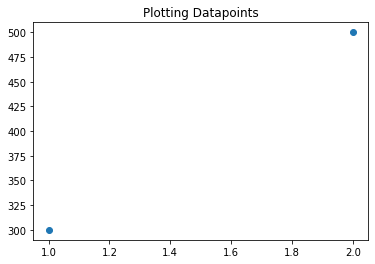

In [21]:
#Plotting the Datapoints
plt.scatter(x_train, y_train)
plt.title("Plotting Datapoints")

# 1. Compute Model Output Function

In [22]:
#Creating Compute function with default parameter value w = 100, b = 100
def compute_model_output(x, w  = 100, b = 100):
    f_wb = np.dot(w,x) + b
    return f_wb
print(f'Initially Computed Output with Default parameter value: {compute_model_output(x_train)}')
print(f'Actual Output: {y_train}')

Initially Computed Output with Default parameter value: [200 300]
Actual Output: [300 500]


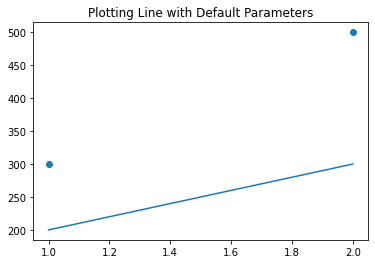

In [23]:
#Plotting graph with default parameter
plt.scatter(x_train, y_train)
plt.plot(x_train, compute_model_output(x_train))
plt.title("Plotting Line with Default Parameters")
plt.show()

# 2. Computing the Cost Function

The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [24]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    y_hat = compute_model_output(x, w, b)
    cost = (y_hat - y)**2
    cost_sum = cost.sum()/(2*m)
    return cost_sum

print(f'Initially Computed Cost with Default parameter value: {compute_cost(x_train, y_train, w, b)}')

Initially Computed Cost with Default parameter value: 12500.0


# 3. Computing Gradient


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [25]:
def compute_gradient(x, y, w = 100, b = 100):
    m = x.shape[0]
    y_hat = compute_model_output(x, w, b)
    dJ_dw = ((y_hat - y)*(x/m)).sum()
    dJ_db = ((y_hat - y)*(1/m)).sum()
    return dJ_dw, dJ_db

print(f'Initially Computed Gradient with Default parameter value: {compute_gradient(x_train, y_train, w = 100, b = 100)}')

Initially Computed Gradient with Default parameter value: (-250.0, -150.0)


# 4. Compute Gradient Descent

In [26]:
def compute_gradient_descent(x, y, w_in, b_in, alpha = 0.01, iterations = 10000, record_history = 10, stop_threshold = 0.0001):
    
    w_in, b_in = w, b
    w_update = []
    b_update = []
    cost_update = []
    iter_no = []    
    
    for i in range(iterations):
        if i % record_history == 0:
            iter_no.append(i)
            w_update.append(w_in)
            b_update.append(b_in)
            cost_update.append(compute_cost(x, y, w_in, b_in)) 
        dJ_dw, dJ_db = compute_gradient(x, y, w_in, b_in)
        w_before, b_before = w_in, b_in
        w_in -= alpha*(dJ_dw)
        b_in -= alpha*(dJ_db)
        if np.abs(w_before - w_in) < stop_threshold and np.abs(b_before - b_in) < stop_threshold:
            print(f'Stop at Iteration No. {i}')
            break
            
    return w_in, b_in, iter_no, w_update, b_update, cost_update



In [27]:
print(f'The initial default parameters are w: {w} and b: {b}')
w_trained, b_trained, iter_no, w_update, b_update, cost_update = compute_gradient_descent(x_train, y_train, w, b, alpha = 0.01, iterations = 10000, stop_threshold = 0.0001)
print(f'After Trained Model parameters are w: {w_trained} and b: {b_trained}')

The initial default parameters are w: 100 and b: 100
Stop at Iteration No. 7931
After Trained Model parameters are w: 199.91534644468604 and b: 100.13697232976644


### Plotting Final Line Fit Output

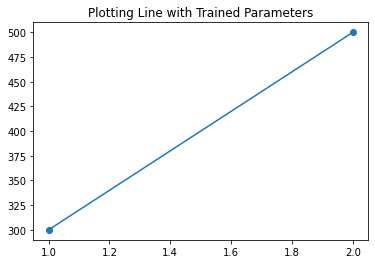

In [28]:
plt.scatter(x_train, y_train)
plt.plot(x_train, compute_model_output(x_train, w_trained, b_trained))
plt.title("Plotting Line with Trained Parameters")
plt.show()

### Plotting Cost vs iterations 

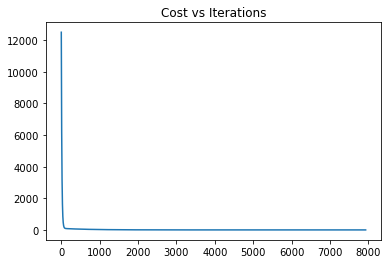

In [29]:
plt.plot(iter_no, cost_update)
plt.title("Cost vs Iterations")
plt.show()

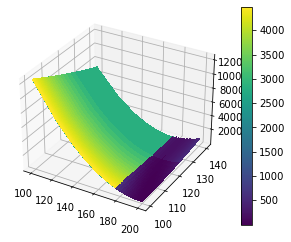

In [30]:
w_grid, b_grid = np.meshgrid(np.array(w_update), np.array(b_update))
cost_grid = np.zeros_like(w_grid)
for i in range(w_grid.shape[0]):
    for j in range(w_grid.shape[1]):
        w = w_grid[i, j]
        b = b_grid[i, j]
        cost = compute_cost(x_train, y_train, w, b)  # Implement your cost function here
        cost_grid[i, j] = cost
surf = plt.axes(projection='3d').plot_surface(w_grid, b_grid, cost_grid, cmap='viridis', antialiased=False)
plt.colorbar(surf)
